In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [7]:
xtest = pd.read_csv('X_test.csv', header=None)
ytest = pd.read_csv('y_test.csv', header=None)
xtrain = pd.read_csv('X_train.csv', header=None)
ytrain = pd.read_csv('y_train.csv', header=None)

In [21]:
xtrain[5] = 1
xtest[5] = 1

In [267]:
#initialize boost weights to 1/n
boost_weights = []

for i in range(len(xtrain)):
    boost_weights.append(1/len(xtrain))

In [25]:
#create weak least squares classifier
def least_squares(x, y):
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x)),np.transpose(x)), y)
    return w

In [351]:
def error(weights, actual, pred):
    error_term = 0
    for i in range(len(actual)):
        if actual[i] != pred[i]:
            error_term += weights[i]
    return error_term

In [463]:
def fboost(a, y):
    #temp = np.matmul(a, y)
    pred = np.sign(np.matmul(a, y))
    return pred

In [485]:
boost_weights = []

for i in range(len(xtrain)):
    boost_weights.append(1/len(xtrain))
    
bootstrap = []
err = []
alpha = []
ypred = []
testpred = []
fboost_train = []
fboost_test = []

for t in range(1500):
    bootstrap.append(np.random.choice(len(xtrain), len(xtrain), p=list(boost_weights)))
    reg_weights = least_squares(xtrain.loc[bootstrap[t]], ytrain.loc[bootstrap[t]])
    ypred.append(np.squeeze(np.sign(np.matmul(xtrain, reg_weights))))
    #err.append(error(boost_weights, np.array(ytrain), ypred))
    err_var = error(boost_weights, np.array(ytrain), ypred[t])
    if err_var > 0.5:
        flag = -1 #flag used to flip sign of test prediction later
        ypred[t] = np.squeeze(np.sign(np.matmul(xtrain, -reg_weights)))
        new_err_var = error(boost_weights, np.array(ytrain), ypred[t])
        err.append(new_err_var)
    else:
        flag = 1 #flag used to flip sign of test prediction later
        err.append(err_var) 
    alpha.append(max((0.5 * np.log((1-err[t])/err[t])), 0))
    e_term = np.exp(-np.array(alpha[t]) * np.squeeze([a*b for a,b in zip(np.array(ytrain), ypred[t])]))
    temp_weights = np.array([a*b for a,b in zip(np.array(e_term), boost_weights)])
    boost_weights = np.squeeze([x/np.sum(temp_weights) for x in temp_weights])
    testpred.append(np.squeeze(np.sign(np.matmul(xtest, flag * reg_weights))))
    fboost_train.append(fboost(alpha, ypred))
    fboost_test.append(fboost(alpha, testpred))

In [489]:
train_error = []
test_error = []

for i in range(len(fboost_train)):
    train_error.append(1 - accuracy_score(ytrain, fboost_train[i]))
    test_error.append(1 - accuracy_score(ytest, fboost_test[i]))

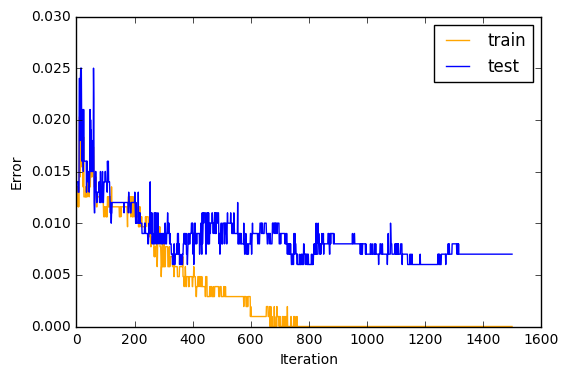

In [490]:
fig = plt.figure()
labels = ['train', 'test']

trainplot = plt.plot(range(len(train_error)), train_error)
testplot = plt.plot(range(len(test_error)), test_error)

plt.setp(trainplot, color='orange')
plt.setp(testplot, color='blue')


plt.legend(labels)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('')

plt.show()

# Part B

In [510]:
running_sum = 0
error_bound = []

for t in range(len(err)):
    running_sum += ((0.5 - err[t]) ** 2)
    output = np.exp(-2 * running_sum)
    error_bound.append(output)

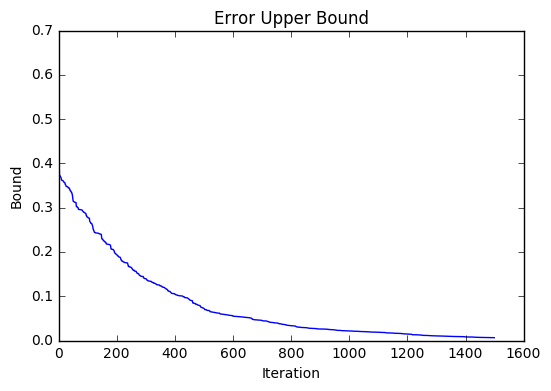

In [513]:
fig = plt.figure()
#labels = ['train', 'test']

upper_bound_plot = plt.plot(range(len(error_bound)), error_bound)

#plt.setp(trainplot, color='orange')
#plt.setp(testplot, color='blue')

#plt.legend(labels)
plt.xlabel('Iteration')
plt.ylabel('Bound')
plt.title('Error Upper Bound')

plt.show()

# Part C

In [529]:
bootstrap_list = []

for i in range(len(bootstrap)):
    bootstrap_list.extend(bootstrap[i])

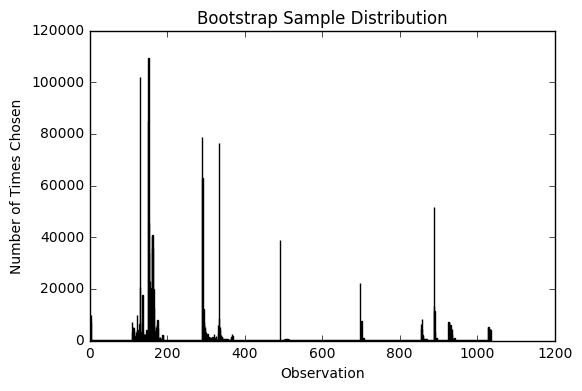

In [534]:
fig = plt.figure()
#labels = ['train', 'test']

bootstrap_hist = plt.hist(bootstrap_list, bins = len(xtrain))

#plt.setp(bootstrap_hist, color='blue')

#plt.legend(labels)
plt.xlabel('Observation')
plt.ylabel('Number of Times Chosen')
plt.title('Bootstrap Sample Distribution')

plt.show()

# Part D

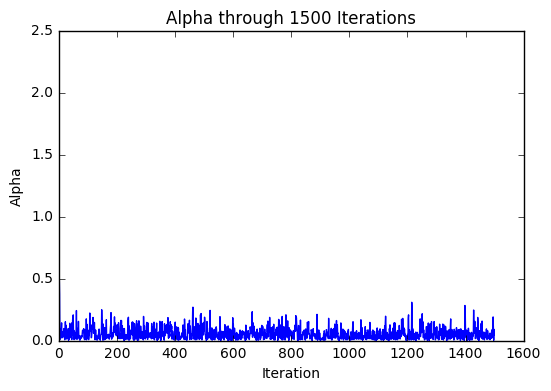

In [538]:
fig = plt.figure()
#labels = ['train', 'test']

alpha_plot = plt.plot(range(len(alpha)), alpha)
plt.xlim(-0.25, 1600)

#plt.setp(bootstrap_hist, color='blue')

#plt.legend(labels)
plt.xlabel('Iteration')
plt.ylabel('Alpha')
plt.title('Alpha through 1500 Iterations')

plt.show()

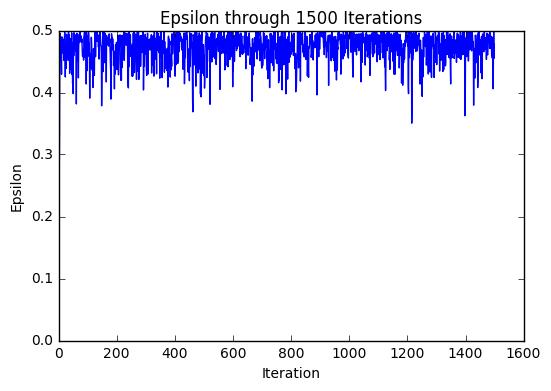

In [539]:
fig = plt.figure()
#labels = ['train', 'test']

alpha_plot = plt.plot(range(len(err)), err)
#plt.xlim(-0.25, 1600)

#plt.setp(bootstrap_hist, color='blue')

#plt.legend(labels)
plt.xlabel('Iteration')
plt.ylabel('Epsilon')
plt.title('Epsilon through 1500 Iterations')

plt.show()

In [540]:
!jupyter nbconvert --to script Boosting.ipynb

[NbConvertApp] Converting notebook Boosting.ipynb to script
[NbConvertApp] Writing 4607 bytes to Boosting.py
